# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\MZ Khan\Desktop\Courses\Machine Learning -- Data Science code\Part 4 - Clustering\Section 24 - K-Means Clustering\Python\Mall_Customers.csv")
df = df.set_index("CustomerID")

In [3]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


# Data Splitting and Visualization

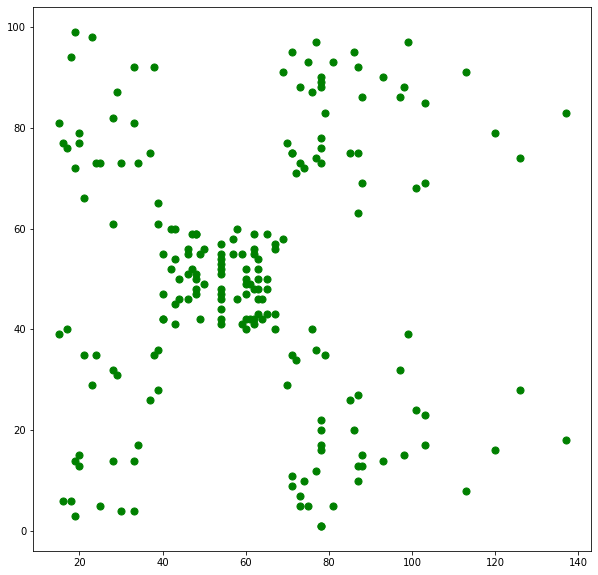

In [54]:
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (10, 10)
df1 = df.iloc[:,[2,3]]


plt.scatter(x = df1.iloc[:,0], y = df1.iloc[:,1], s = 50, color ="green")
#plt.figure(figsize=(20,20))
plt.show()


# Using Elbow method to find optimal number of Cluster

C:\Users\MZ Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


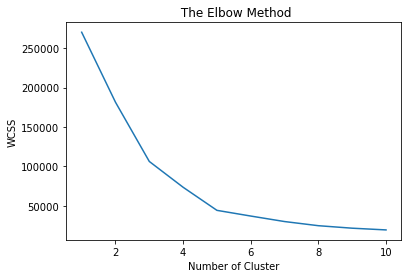

In [41]:
from sklearn.cluster import KMeans

 # wcss = within sum of cluster

wcss = []

for i in range(1, 11):  # we will use 10 cluster
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_) # This function calculate, each clusters cetteriod and measure the points on each clusters

plt.plot(range(1, 11), wcss)
plt.title(" The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()


# Using Dendrogram Approach for Clustering

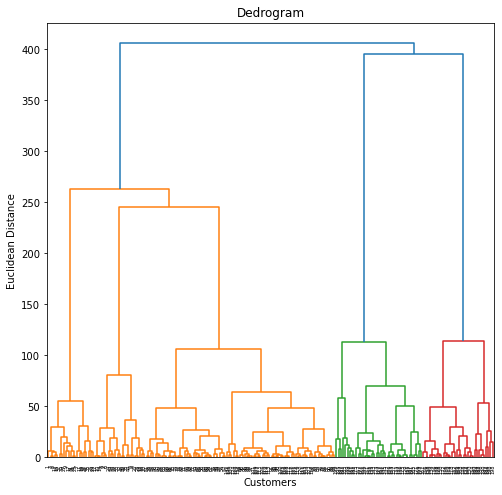

In [61]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df1, method = 'ward'))

plt.rcParams['figure.figsize'] = (15, 20)

plt.title("Dedrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Training the K-Means model on the Dataset

In [44]:
kmeans =KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# 'k-means++' prevent randomization of clustering in the model.
# fit_predict() method fit the model and creates dependent variables for each clusters we create in the model.

y_pred_kmeans = kmeans.fit_predict(df1) 


print(y_pred_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Visualizing the Clusters 

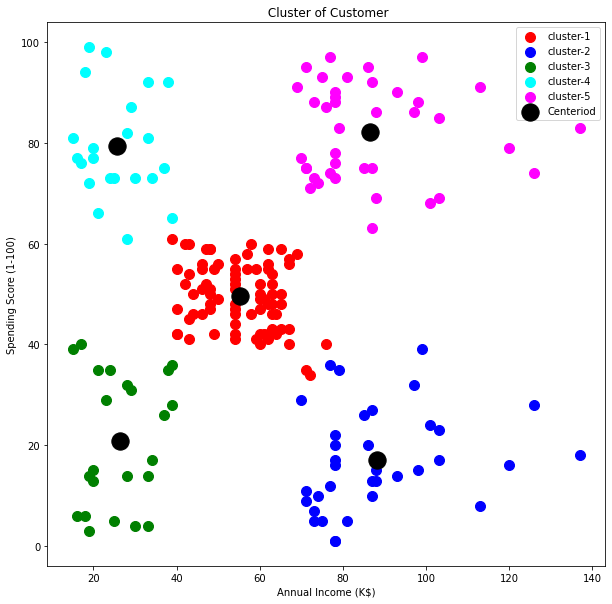

In [60]:
plt.scatter(df1.iloc[y_pred_kmeans == 0,0], df1.iloc[y_pred_kmeans == 0,1], s = 100, color = 'red', label = 'cluster-1')
plt.scatter(df1.iloc[y_pred_kmeans == 1,0], df1.iloc[y_pred_kmeans == 1,1], s = 100, color = 'blue', label = 'cluster-2')
plt.scatter(df1.iloc[y_pred_kmeans == 2,0], df1.iloc[y_pred_kmeans == 2,1], s = 100, color = 'green', label = 'cluster-3')
plt.scatter(df1.iloc[y_pred_kmeans == 3,0], df1.iloc[y_pred_kmeans == 3,1], s = 100, color = 'cyan', label = 'cluster-4')
plt.scatter(df1.iloc[y_pred_kmeans == 4,0], df1.iloc[y_pred_kmeans == 4,1], s = 100, color = 'magenta', label = 'cluster-5')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = 'black', label = 'Centeriod')

plt.rcParams['figure.figsize'] = (8, 8)

plt.title(" Cluster of Customer")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()